In [4]:
using Plots
using DSP
using LinearAlgebra

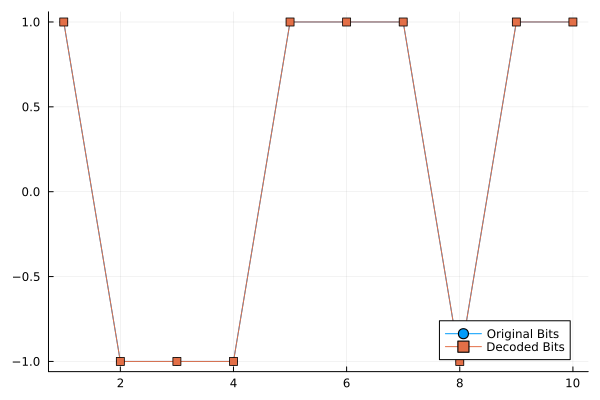

In [5]:
# System Parameters
h = [1.0, 0.5]  # Channel coefficients
N = 10          # Number of bits

# Generate random transmitted bits (+1 or -1)
x = rand([-1, 1], N)

# Simulate the channel with ISI and noise
y = conv(x, h)[1:N] + 0.2 * randn(N)  # Adding Gaussian noise

# Viterbi Algorithm to decode the received signal
function viterbi_decode(y, h, N)
    # States (+1 or -1 for each of the two taps)
    states = [1 1; 1 -1; -1 1; -1 -1]
    L = size(states, 1)
    
    # Path metrics, initialized to zero
    path_metrics = zeros(L)
    paths = [Int[] for _ in 1:L]
    
    # Process each symbol
    for n in 1:N
        new_path_metrics = fill(Inf, L)
        new_paths = [copy(paths[i]) for i in 1:L]
        
        # Calculate path metrics for each state
        for s in 1:L
            for prev_s in 1:L
                predicted_y = dot(h, states[prev_s, :])
                metric = (y[n] - predicted_y)^2 + path_metrics[prev_s]
                if metric < new_path_metrics[s]
                    new_path_metrics[s] = metric
                    new_paths[s] = copy(paths[prev_s])
                    push!(new_paths[s], states[prev_s, 1])
                end
            end
        end
        
        path_metrics = new_path_metrics
        paths = new_paths
    end
    
    # Find the best path
    min_metric, best_idx = findmin(path_metrics)
    return paths[best_idx]
end

# Decode the received signal
decoded_bits = viterbi_decode(y, h, N)

# Plotting the original and decoded signals for comparison
plot(1:N, x, label="Original Bits", marker=:circle)
plot!(1:N, decoded_bits, label="Decoded Bits", marker=:square)


# References

- [ ] [Viterbi Algorithm Explained with an Example](https://www.youtube.com/watch?v=xxpBHCkypS4)